<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/FH/Lab4_FH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4. Frank-Hertz experiment

Igor Gitelman, 2024, v0.3

Evgeny Kolonsky 2024



In [1]:
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import pandas as pd # handling data structures (loaded from files)
from scipy.signal import find_peaks as find_peaks # Find peaks inside a signal based on peak properties.

from scipy.signal import savgol_filter


In [6]:
# Place path to your data here.
# When using Ananconda locally UPLOAD your data to Anaconda environment.
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/FH/fh2.csv'

v1, I1, T1 = np.genfromtxt(URL, skip_header=6, usecols=[0,1,2]).T
v2, I2, T2 = np.genfromtxt(URL, skip_header=6, usecols=[3,4,5]).T

Text(0.5, 0, 'Acceleration voltage, V')

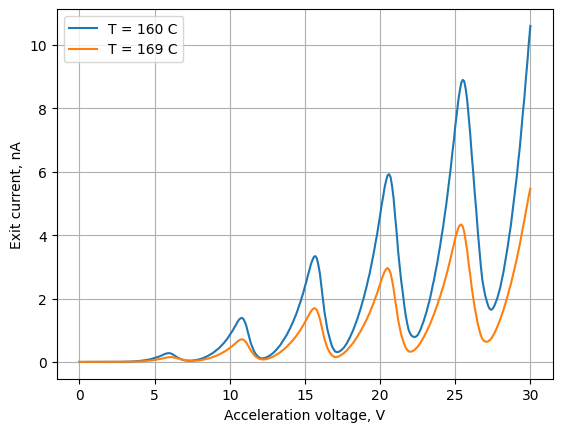

In [15]:
plt.plot(v1, I1/1000, label=f'T = {np.mean(T1):.0f} C')
plt.plot(v2, I2/1000, label=f'T = {np.mean(T2):.0f} C')
plt.grid()
plt.legend()
plt.ylabel('Exit current, nA')
plt.xlabel('Acceleration voltage, V')


Text(0.5, 0, 'Acceleration voltage, V')

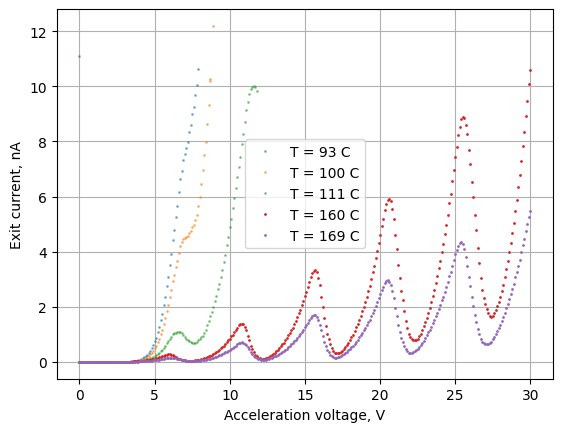

In [56]:
# Place path to your data here.
# When using Ananconda locally UPLOAD your data to Anaconda environment.
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/FH/fh_coldlamp.csv'

for idx in range(3, 12, 3):
  v, I, T = np.genfromtxt(URL, delimiter='\t',skip_header=6, usecols=[idx,idx+1,idx+2]).T
  plt.plot(v, I/1000, '.', markersize=2, label=f'T = {np.nanmean(T):.0f} C', alpha=0.5)


URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/FH/fh2.csv'

v1, I1, T1 = np.genfromtxt(URL, skip_header=6, usecols=[0,1,2]).T
v2, I2, T2 = np.genfromtxt(URL, skip_header=6, usecols=[3,4,5]).T
plt.plot(v1, I1/1000, '.', markersize=2, label=f'T = {np.nanmean(T1):.0f} C')
plt.plot(v2, I2/1000, '.', markersize=2, label=f'T = {np.nanmean(T2):.0f} C')



plt.grid()
plt.legend()
plt.ylabel('Exit current, nA')
plt.xlabel('Acceleration voltage, V')



In [50]:
# round by meaningful digits
# with respect to error
def round_meaningful(value, error):
  if error <=0:
    # return unchanged and break
    return value, error

  # Power of error
  power_err = int(np.floor(np.log10(error)))

  # Digits of error in format a.bcd
  n_err = error / (10**np.floor(power_err))

  # keep 2-digits only for errors like 1.0, 1.1
  # otherwise round it up
  if n_err >= 1.2:
    n_err = np.ceil(n_err)
    error = n_err * 10** power_err

  error_rounded = np.round(error, -power_err)
  value_rounded = np.round(value, -power_err)

  return value_rounded, error_rounded


# Print  value with respect to uncertainty and some text
def print_me(value, error=0, label=''):

  value, error = round_meaningful(value, error)

  return f'{value:.2f} ± {error:.2f} {label}'

def uncert(x):
  d = np.diff(x)
  return print_me(np.mean(d), np.std(d))

Text(0.5, 0, 'Acceleration voltage, V')

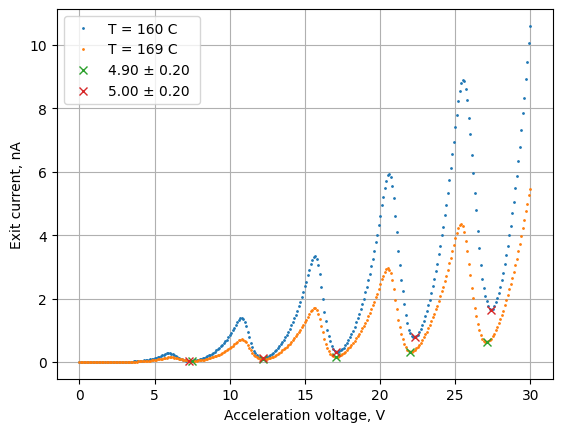

In [57]:
URL = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/FH/fh2.csv'

v1, I1, T1 = np.genfromtxt(URL, skip_header=6, usecols=[0,1,2]).T
v2, I2, T2 = np.genfromtxt(URL, skip_header=6, usecols=[3,4,5]).T
plt.plot(v1, I1/1000, '.', markersize=2, label=f'T = {np.nanmean(T1):.0f} C')
plt.plot(v2, I2/1000, '.', markersize=2, label=f'T = {np.nanmean(T2):.0f} C')

v, I, T = v2, I2, T2
peaks, _ = find_peaks(-I, prominence=5, width=5 )
plt.plot(v[peaks], I[peaks]/1000, 'x', label=uncert(v[peaks]))

v, I, T = v1, I1, T1
peaks, _ = find_peaks(-I, prominence=5, width=5 )
plt.plot(v[peaks], I[peaks]/1000, 'x', label=uncert(v[peaks]))


plt.grid()
plt.legend()
plt.ylabel('Exit current, nA')
plt.xlabel('Acceleration voltage, V')